In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load individual datasets
df_client_profiles = pd.read_csv('df_final_demo.txt', sep=',')  # Adjust the separator if different
df_experiment_roster = pd.read_csv('df_final_experiment_clients.txt', sep=',')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt', sep=',')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt', sep=',')

In [3]:
# Explore each of them
df_client_profiles.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
df_experiment_roster.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
df_final_web_data_pt_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [6]:
df_final_web_data_pt_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [7]:
# Merge the two parts of "df_digital_footprints"
df_digital_footprints = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

In [8]:
df_digital_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [9]:
df_client_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [10]:
df_experiment_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
# Remove duplicates
df_client_profiles.drop_duplicates(inplace=True)
df_experiment_roster.drop_duplicates(inplace=True)
df_digital_footprints.drop_duplicates(inplace=True)

In [12]:
# Check for null values in df_client_profiles
print("Null values in df_client_profiles:")
print(df_client_profiles.isnull().sum())

# Check for null values in df_experiment_roster
print("\nNull values in df_experiment_roster:")
print(df_experiment_roster.isnull().sum())

# Check for null values in df_digital_footprints
print("\nNull values in df_digital_footprints:")
print(df_digital_footprints.isnull().sum())

Null values in df_client_profiles:
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Null values in df_experiment_roster:
client_id        0
Variation    20109
dtype: int64

Null values in df_digital_footprints:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [13]:
# Remove rows where 'Variation' has null values
df_experiment_roster_clean = df_experiment_roster.dropna(subset=['Variation'])

In [14]:
# Filter rows with any null values
null_client_profiles = df_client_profiles[
    df_client_profiles.isnull().any(axis=1)
]
# Check the unique client_ids with null values
unique_null_client_ids = null_client_profiles['client_id'].unique()

# Output the unique client_ids and the number of unique clients
print("Unique client IDs with null values:")
print(unique_null_client_ids)

print("\nNumber of unique clients with null values:")
print(len(unique_null_client_ids))

Unique client IDs with null values:
[7402828  355337 8412164 4666211 2222915 4876926 5277910 7616759 8191345
 1227228 8611797 5144725 1037867 1618749 6021001]

Number of unique clients with null values:
15


In [15]:
# List of client IDs to remove
clients_to_remove = [7402828, 355337, 8412164, 2222915, 4876926, 5277910, 7616759,
                    8191345, 1227228, 8611797, 5144725, 1037867, 1618749, 6021001]

# Filter the DataFrame to keep rows not containing these client IDs
df_client_profiles_clean = df_client_profiles[~df_client_profiles['client_id'].isin(clients_to_remove)]

# Check the shape of the DataFrame to confirm removal
print(f"Original number of rows: {df_client_profiles.shape[0]}")
print(f"Number of rows after removal: {df_client_profiles_clean.shape[0]}")

Original number of rows: 70609
Number of rows after removal: 70595


In [16]:
# Merge df_client_profiles_clean with df_experiment_roster_clean on 'client_id'
clients_complete_df = pd.merge(df_client_profiles_clean, df_experiment_roster_clean, on='client_id', how='inner')

In [17]:
clients_complete_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [18]:
# Create a DataFrame for rows where Variation is 'Test'
test_clients_df = clients_complete_df.loc[clients_complete_df['Variation'] == 'Test']

# Create a DataFrame for rows where Variation is 'Control'
control_clients_df = clients_complete_df.loc[clients_complete_df['Variation'] == 'Control']

## DEMOGRAPHIC ANALYSIS

In [19]:
# Define the age ranges and corresponding labels
age_bins = [0, 18, 30, 55, 70, 100]  # Age boundaries
age_labels = ['Under 18', '18-30', '31-55', '56-70', '71-100']  # Corresponding labels

#ALL CLIENTS
# Create a new column with the age groups
clients_complete_df['age_group'] = pd.cut(clients_complete_df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Group by the age group and count the number of clients in each
age_group_counts = clients_complete_df['age_group'].value_counts()

# Calculate the proportions
total_clients = len(clients_complete_df)
age_group_proportions = round((age_group_counts / total_clients) * 100,2) 

# Create a DataFrame with counts and proportions
age_group_df = pd.DataFrame({
    'Age Group': age_group_counts.index,
    'Count': age_group_counts.values,
    'Proportion (%)': age_group_proportions.values
}).reset_index(drop=True)


print("AGE GROUPS OF ALL CLIENTS:")
age_group_df


AGE GROUPS OF ALL CLIENTS:


,Age Group,Count,Proportion (%)
0,31-55,23746,47.03
1,56-70,14779,29.27
2,18-30,8469,16.77
3,71-100,3431,6.80
4,Under 18,62,0.12


In [20]:

# TEST CLIENTS
# Create a new column with the age groups
test_clients_df['age_group'] = pd.cut(test_clients_df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Group by the age group and count the number of clients in each
test_age_group_counts = test_clients_df['age_group'].value_counts()

# Calculate the proportions
total_clients = len(test_clients_df)
age_group_proportions = round((test_age_group_counts / total_clients) * 100,2) 

# Create a DataFrame with counts and proportions
test_age_group_df = pd.DataFrame({
    'Age Group': test_age_group_counts.index,
    'Count': test_age_group_counts.values,
    'Proportion (%)': age_group_proportions.values
}).reset_index(drop=True)


print("AGE GROUPS OF TEST CLIENTS:")
test_age_group_df


AGE GROUPS OF TEST CLIENTS:


C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\3935488060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clients_df['age_group'] = pd.cut(test_clients_df['clnt_age'], bins=age_bins, labels=age_labels, right=False)


,Age Group,Count,Proportion (%)
0,31-55,12784,47.42
1,56-70,7786,28.88
2,18-30,4562,16.92
3,71-100,1795,6.66
4,Under 18,34,0.13


In [21]:
# CONTROL CLIENTS
# Create a new column with the age groups
control_clients_df['age_group'] = pd.cut(control_clients_df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Group by the age group and count the number of clients in each
control_age_group_counts = control_clients_df['age_group'].value_counts()

# Calculate the proportions
total_clients = len(control_clients_df)
age_group_proportions = round((control_age_group_counts / total_clients) * 100,2) 

# Create a DataFrame with counts and proportions
control_age_group_df = pd.DataFrame({
    'Age Group': control_age_group_counts.index,
    'Count': control_age_group_counts.values,
    'Proportion (%)': age_group_proportions.values
}).reset_index(drop=True)


print("AGE GROUPS OF CONTROL CLIENTS:")
control_age_group_df

AGE GROUPS OF CONTROL CLIENTS:


C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\3162020319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_clients_df['age_group'] = pd.cut(control_clients_df['clnt_age'], bins=age_bins, labels=age_labels, right=False)


,Age Group,Count,Proportion (%)
0,31-55,10962,46.59
1,56-70,6993,29.72
2,18-30,3907,16.61
3,71-100,1636,6.95
4,Under 18,28,0.12


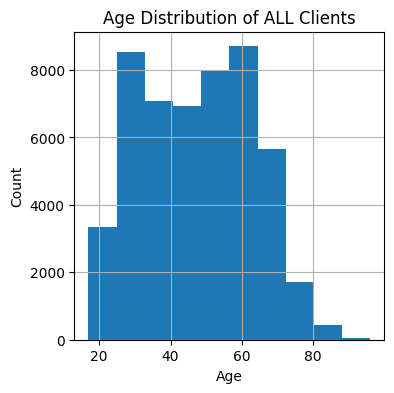

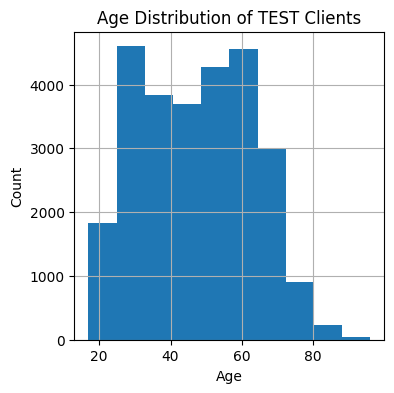

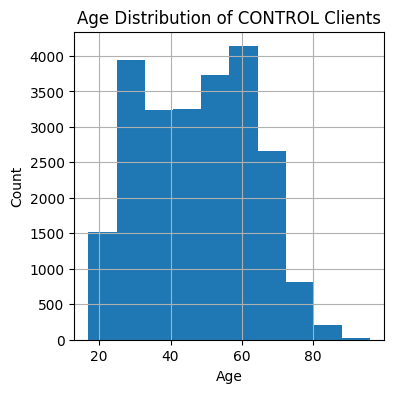

In [22]:
# Age distribution histogram
plt.figure(figsize=(4, 4))

clients_complete_df['clnt_age'].hist(bins=10)
plt.title('Age Distribution of ALL Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(4, 4))

test_clients_df['clnt_age'].hist(bins=10)
plt.title('Age Distribution of TEST Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(4, 4))

control_clients_df['clnt_age'].hist(bins=10)
plt.title('Age Distribution of CONTROL Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [23]:
# Clean the gender column: Replace 'X' with 'U'
clients_complete_df['gendr'] = clients_complete_df['gendr'].replace('X', 'U')

In [24]:
# Gender Breakdown
# Calculate the proportion of clients by gender
gender_counts = clients_complete_df['gendr'].value_counts()
gender_proportions = round((gender_counts / len(clients_complete_df)) * 100,2)

# Create a DataFrame for the gender proportions
gender_df = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values,
    'Proportion (%)': gender_proportions.values
}).reset_index(drop=True)

# Display the DataFrame
gender_df


,Gender,Count,Proportion (%)
0,U,17282,34.23
1,M,16947,33.57
2,F,16259,32.20


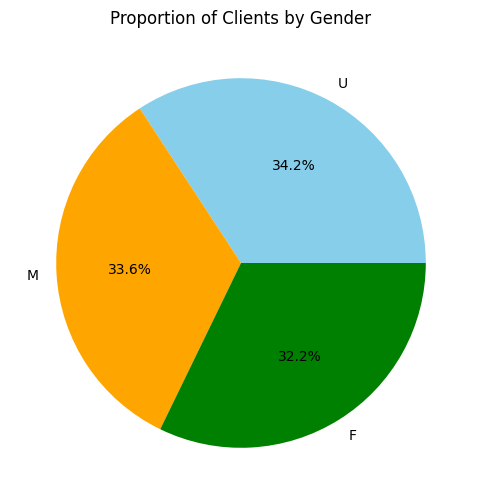

In [25]:
# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_df['Proportion (%)'], labels=gender_df['Gender'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Proportion of Clients by Gender')
plt.show()

In [26]:
# AGE AND GENDER RELATION
# Summary statistics
age_gender_stats = clients_complete_df.groupby('gendr')['clnt_age'].agg(['mean', 'median', 'count']).reset_index()
age_gender_stats

,gendr,mean,median,count
0,F,50.423730,52.0,16258
1,M,49.495810,50.5,16947
2,U,42.265941,39.5,17282


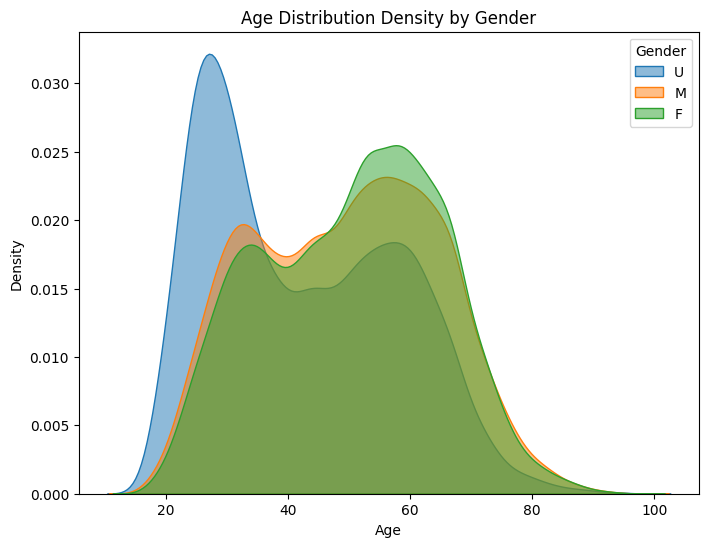

In [27]:
# Density Plot for Age Distribution
plt.figure(figsize=(8, 6))
for gender in clients_complete_df['gendr'].unique():
    subset = clients_complete_df[clients_complete_df['gendr'] == gender]
    sns.kdeplot(subset['clnt_age'], label=gender, fill=True, alpha=0.5)
plt.title('Age Distribution Density by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.show()

C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\367109674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gendr', y='clnt_age', data=clients_complete_df, palette='Set2')


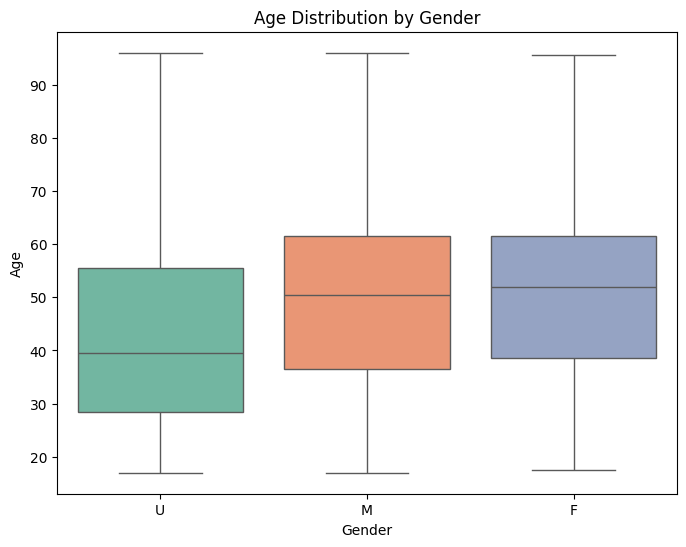

In [28]:
# Boxplot for Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gendr', y='clnt_age', data=clients_complete_df, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## Count of Accounts per client

In [29]:
accounts_stats = clients_complete_df.groupby('num_accts')['client_id'].count().reset_index()
accounts_stats.columns = ['Number of Accounts', 'Client Count']
accounts_stats['Proportion (%)'] = round((accounts_stats['Client Count'] / len(clients_complete_df)) * 100,2)
accounts_stats

,Number of Accounts,Client Count,Proportion (%)
0,1.0,1,0.00
1,2.0,39721,78.67
2,3.0,8947,17.72
3,4.0,1585,3.14
4,5.0,205,0.41
5,6.0,23,0.05
6,7.0,6,0.01


C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\1565237447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Accounts', y='Client Count', data=accounts_stats, palette='viridis')


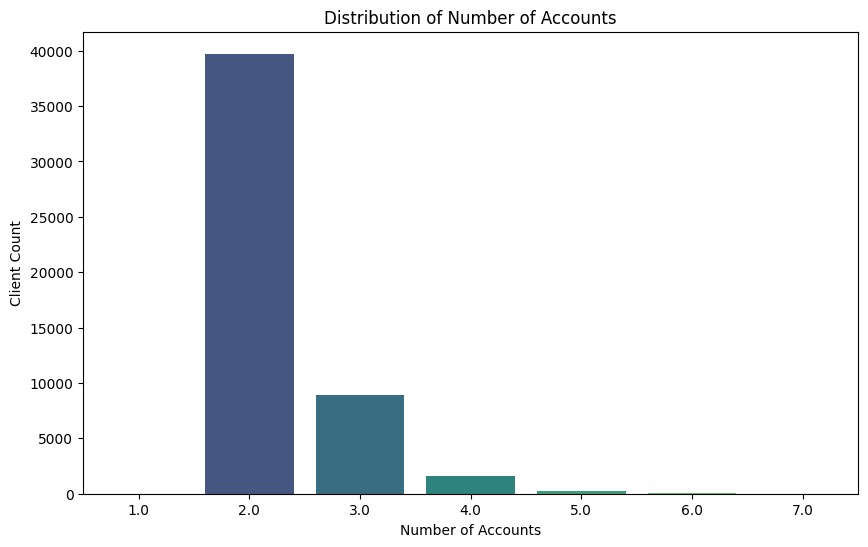

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Accounts', y='Client Count', data=accounts_stats, palette='viridis')
plt.title('Distribution of Number of Accounts')
plt.xlabel('Number of Accounts')
plt.ylabel('Client Count')
plt.show()

## Age vs. Tenure

In [31]:

tenure_bins = [0, 5, 15, 30, 70]  # Define tenure bins
tenure_labels = ['New (<5 yrs)', 'Mid (5-15 yrs)', 'Long (15-30 yrs)', 'Very Long (30+ yrs)']
clients_complete_df['tenure_category'] = pd.cut(clients_complete_df['clnt_tenure_yr'], bins=tenure_bins, labels=tenure_labels, right=False)

In [32]:
print(clients_complete_df[['clnt_age', 'clnt_tenure_yr', 'tenure_category']].head())

   clnt_age  clnt_tenure_yr   tenure_category
0      60.5             6.0    Mid (5-15 yrs)
1      58.0             7.0    Mid (5-15 yrs)
2      32.0             5.0    Mid (5-15 yrs)
3      49.0            16.0  Long (15-30 yrs)
4      33.0            12.0    Mid (5-15 yrs)


C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\2944208326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenure Category', y='Client Count', data=tenure_category_counts, palette='Set3')


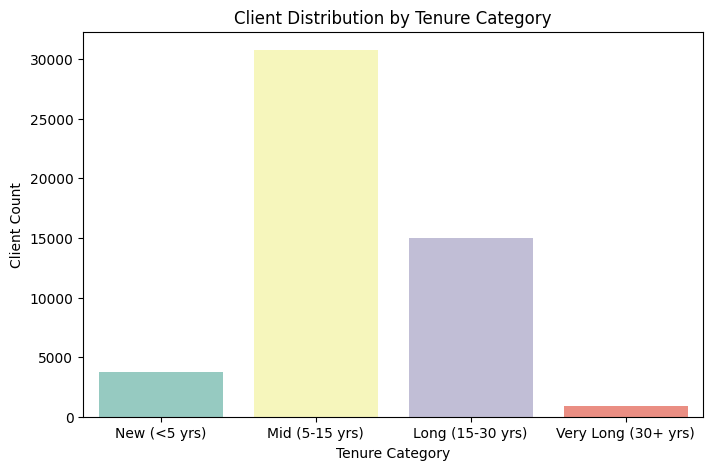

In [33]:
plt.figure(figsize=(8, 5))
tenure_category_counts = clients_complete_df['tenure_category'].value_counts().reset_index()
tenure_category_counts.columns = ['Tenure Category', 'Client Count']
sns.barplot(x='Tenure Category', y='Client Count', data=tenure_category_counts, palette='Set3')
plt.title('Client Distribution by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Client Count')
plt.show()

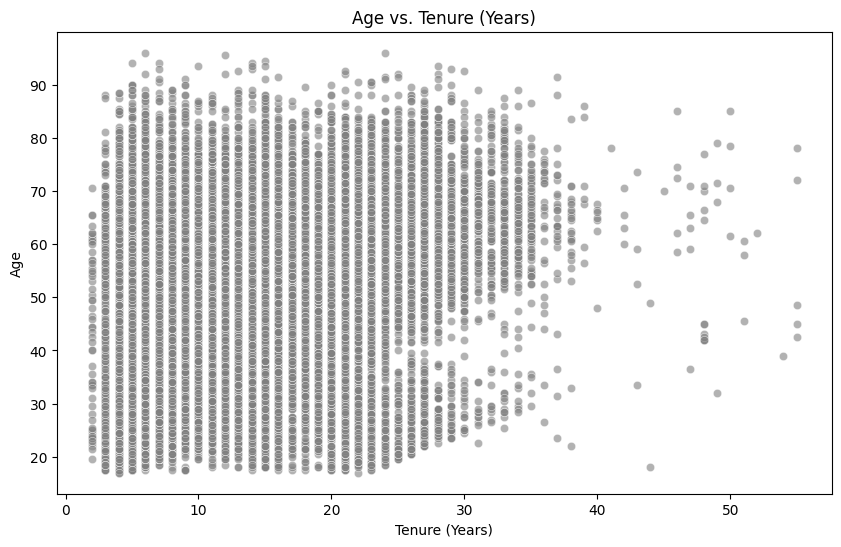

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clnt_tenure_yr', y='clnt_age', data=clients_complete_df, color='grey', alpha=0.6)
plt.title('Age vs. Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Age')
plt.show()

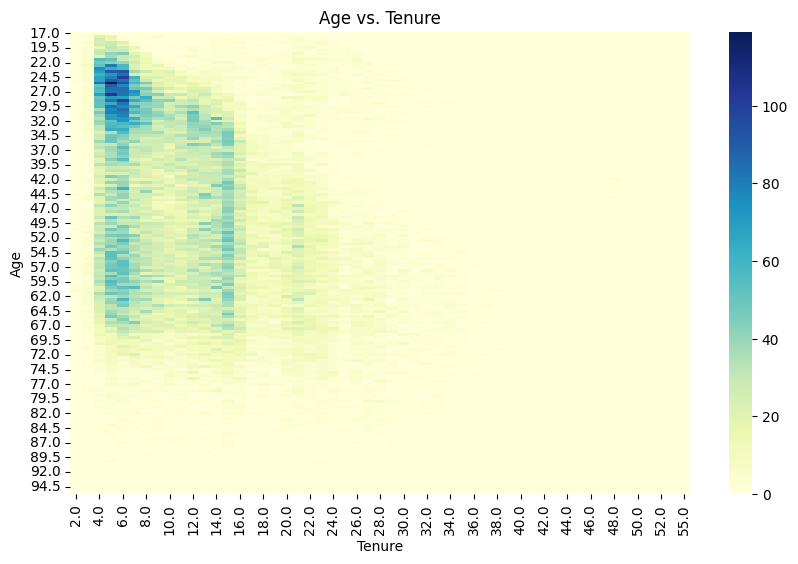

In [35]:
plt.figure(figsize=(10, 6))
heatmap_data = clients_complete_df.pivot_table(index='clnt_age', columns='clnt_tenure_yr', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True)
plt.title('Age vs. Tenure')
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.show()


C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\39067572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num_accts', y='clnt_tenure_yr', data=clients_complete_df, palette='muted', scale='width')
C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\39067572.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='num_accts', y='clnt_tenure_yr', data=clients_complete_df, palette='muted', scale='width')


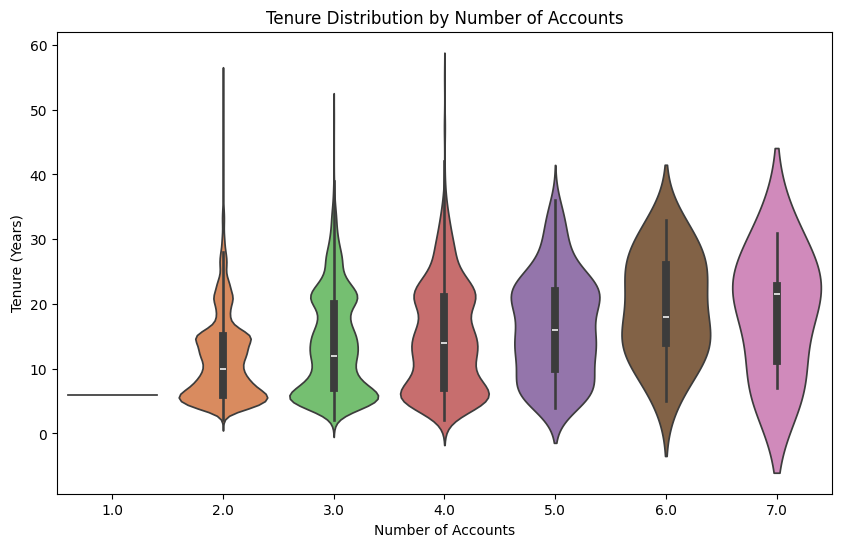

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_accts', y='clnt_tenure_yr', data=clients_complete_df, palette='muted', scale='width')
plt.title('Tenure Distribution by Number of Accounts')
plt.xlabel('Number of Accounts')
plt.ylabel('Tenure (Years)')
plt.show()

## BALANCE AND AGE

C:\Users\Ro\AppData\Local\Temp\ipykernel_13692\677946612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='bal', data=clients_complete_df, palette='Set3')


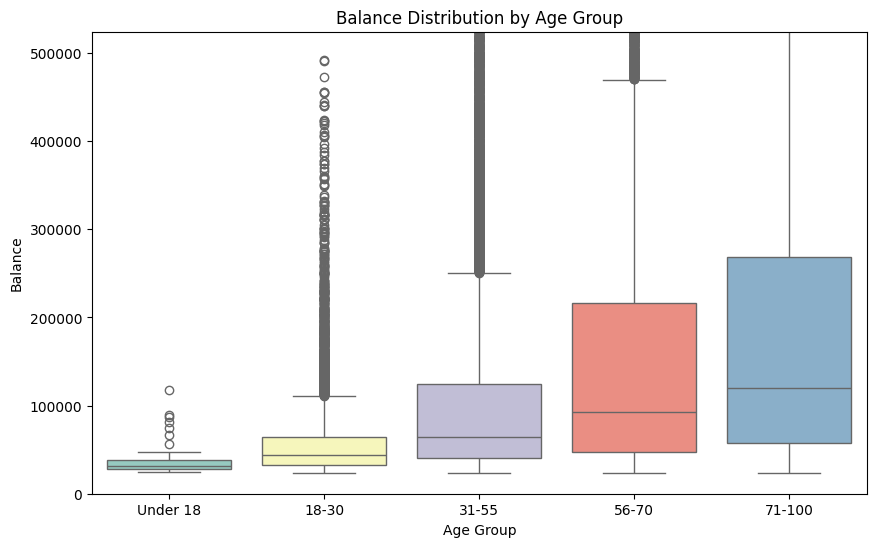

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bal', data=clients_complete_df, palette='Set3')
plt.title('Balance Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.ylim(0, clients_complete_df['bal'].quantile(0.95))  # Focus on data below the 95th percentile
plt.show()

## 

## ACCOUNTS TENURE & BALANCES

In [38]:
# Step 1: Group data by the number of accounts and calculate average tenure and balances
accounts_analysis = clients_complete_df.groupby('num_accts').agg(
    avg_tenure=('clnt_tenure_yr', 'mean'),
    avg_balance=('bal', 'mean'),
    client_count=('client_id', 'count')
).reset_index()

In [39]:
accounts_analysis

,num_accts,avg_tenure,avg_balance,client_count
0,1.0,6.000000,3.101234e+04,1
1,2.0,11.514312,1.130488e+05,39721
2,3.0,13.715547,2.486498e+05,8947
3,4.0,14.776025,4.247617e+05,1585
4,5.0,16.575610,6.428255e+05,205
5,6.0,19.521739,1.024319e+06,23
6,7.0,18.666667,8.332765e+05,6


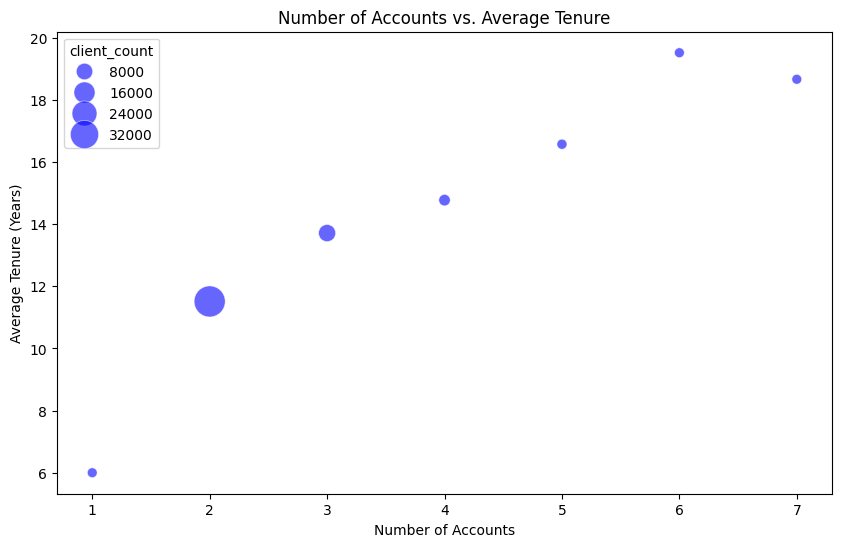

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_accts', y='avg_tenure', size='client_count', sizes=(50, 500), data=accounts_analysis, color='blue', alpha=0.6)
plt.title('Number of Accounts vs. Average Tenure')
plt.xlabel('Number of Accounts')
plt.ylabel('Average Tenure (Years)')
plt.show()

In [41]:
df_client_profiles_clean.to_csv(path_or_buf='./df_client_profiles_clean.csv', sep=',', header=True)

In [42]:
df_experiment_roster_clean.to_csv(path_or_buf='./df_experiment_roster_clean.csv', sep=',', header=True)